In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from skimage import io
import math

In [2]:
image = io.imread('../doc/Lepton_Capture.tiff')

In [3]:
print(image.shape)

(196, 120, 160)


In [4]:
image[0]

array([[29993, 29984, 29966, ..., 29912, 29906, 29914],
       [30001, 29976, 29972, ..., 29914, 29923, 29929],
       [29982, 29974, 29982, ..., 29916, 29906, 29933],
       ...,
       [30113, 30062, 30068, ..., 29862, 29891, 29893],
       [30093, 30068, 30081, ..., 29875, 29873, 29902],
       [30087, 30077, 30066, ..., 29877, 29870, 29896]], dtype=uint16)

In [5]:
frames, height, width = image.shape
print(frames)

196


### Import image and read statistics

In [6]:
image = io.imread('../doc/Lepton_Capture.tiff')
frames, height, width = image.shape

### Determining dimensions - find origin

In [7]:
frames, height, width = image.shape
rowmid = int(width / 2)
colmid = int(height / 2)


###  Choosing specific frames

In [23]:
frame = 0
factor = 14 #approx half a second
chosenframes = []

while frame <= frames-1:
    if frame % factor == 0:
        chosenframes.append(frame)
        frame = frame + 1
    else:
        frame = frame + 1

In [24]:
print(chosenframes)

[0, 14, 28, 42, 56, 70, 84, 98, 112, 126, 140, 154, 168, 182]


In [25]:
chosenframes[3]

42

### Read single temperature in single frame

In [26]:
imarray = np.array( image)
imarray.shape

(196, 120, 160)

In [27]:
image.shape

(196, 120, 160)

Celsius - max - frame 0

In [28]:
framearray = imarray[56]
C = (framearray.max() - 27315) / 100 
C

37.91

Fahrenheit - max - frame 0

In [29]:
framearray = imarray[0]
C = (framearray.max() - 27315) / 100 
F = C * 9 / 5 + 32
F

100.022

In [30]:
def centikelvin_to_celsius(temp):
    cels = (temp - 27315)/100
    return cels

def to_fahrenheit(temp):
    cels = centikelvin_to_celsius(temp)
    fahr = cels * 9 / 5 + 32
    return fahr

def to_temperature(temp):
    cels = centikelvin_to_celsius(temp)
    fahr = cels * 9 / 5 + 32
    return cels, fahr


In [31]:
framearray = imarray[0]
temp = framearray[colmid,rowmid]

cels, fahr = to_temperature(temp)
fahr = to_fahrenheit(temp)

print("celsius: ", cels, " , fahrenheit: ",fahr)

celsius:  36.01  , fahrenheit:  96.818


Possible temperatures:
* Min
* Max
* Mean
* Any predetermined point - center

### Loop through multiple chosen frames with single temperature

In [32]:
maxlength = len(chosenframes)
alltempc = []
alltempf = []
index = 0
print(maxlength)

14


In [33]:
while index < maxlength:
    print(index)
    frame = chosenframes[index]
    framearray = imarray[frame]
    temp = framearray[colmid,rowmid]
    cels, fahr = to_temperature(temp)
    alltempc.append(cels)
    alltempf.append(fahr)
    index = index + 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [34]:
print(alltempc)

[36.01, 28.06, 35.49, 32.66, 35.92, 35.39, 35.6, 35.81, 35.64, 35.52, 36.3, 29.94, 31.94, 32.05]


### Indexing time over frames for a single temperature
Assumptions: frame per a second is 27 - from Lepton FLIR manual talking about one frame video data being in 1/27th of a second. 

In [35]:
alltime = []
maxlength = len(chosenframes)
index = 0

while index < maxlength:
    frame = chosenframes[index]
    time = frame / 27
    alltime.append(round(time, 2))
    index = index + 1

In [36]:
print(alltime)

[0.0, 0.52, 1.04, 1.56, 2.07, 2.59, 3.11, 3.63, 4.15, 4.67, 5.19, 5.7, 6.22, 6.74]


### Create dataframe of all data

In [37]:
data = pd.DataFrame()
data['Frame'] = chosenframes
data['Time'] = alltime
data['Temp (C)'] = alltempc
data['Temp (F)'] = alltempf
data

,Frame,Time,Temp (C),Temp (F)
0,0,0.00,36.01,96.818
1,14,0.52,28.06,82.508
2,28,1.04,35.49,95.882
3,42,1.56,32.66,90.788
4,56,2.07,35.92,96.656
5,70,2.59,35.39,95.702
6,84,3.11,35.60,96.080
7,98,3.63,35.81,96.458
8,112,4.15,35.64,96.152
9,126,4.67,35.52,95.936


### Graphing change of temperature over time 

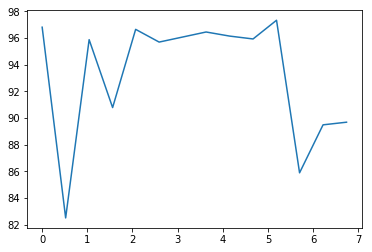

In [38]:
plt.plot(data['Time'], data['Temp (F)'])

### Reading all temperature in single frame

In [39]:
framearray = imarray[0]
alltempall = np.zeros((height, width))
row = 0
col = 0

while col < height :
    row = 0
    while row < width:
        temp = framearray[col, row]
        cels, fahr = to_temperature(temp)
        alltempall[col, row] = cels
        row += 1
    col += 1

In [40]:
print(alltempall)

[[26.78 26.69 26.51 ... 25.97 25.91 25.99]
 [26.86 26.61 26.57 ... 25.99 26.08 26.14]
 [26.67 26.59 26.67 ... 26.01 25.91 26.18]
 ...
 [27.98 27.47 27.53 ... 25.47 25.76 25.78]
 [27.78 27.53 27.66 ... 25.6  25.58 25.87]
 [27.72 27.62 27.51 ... 25.62 25.55 25.81]]
